In [1]:
!pip install sentiment-analysis-spanish

import pandas as pd

df = pd.read_csv('tweets_limpios_sin_HT.csv', sep=',')
df100Citados = pd.read_csv('Tuits_100_Usuarios_Citados.csv', sep=',')
df100Followers = pd.read_csv('Tuits_100_Usuarios_Followers.csv', sep=',')
df100Likes = pd.read_csv('Tuits_100_Usuarios_Likes.csv', sep=',')
df100Respuestas = pd.read_csv('Tuits_100_Usuarios_Respuestas.csv', sep=',')
df100Retweets = pd.read_csv('Tuits_100_Usuarios_Retweets.csv', sep=',')
df100Vistas = pd.read_csv('Tuits_100_Usuarios_Vistas.csv', sep=',')
df500Usuarios = pd.read_csv('Tuits_500_Usuarios.csv', sep=',')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 42.5 MB/s eta 0:00:00


In [46]:
import re,string

def remove_exclamaciones (text):
  return re.sub('[%s]' % re.escape('¡¿'), '', text)

def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in string.punctuation:
        if separator not in entity_prefixes:
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)
  
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', text)

listado = []

for t in df.Texto:
    listado.append(strip_all_entities(strip_links(deEmojify(remove_exclamaciones(t)))))

df['TextoLimpio'] = listado

listado = []

for t in df100Citados.Texto:
    listado.append(strip_all_entities(strip_links(deEmojify(remove_exclamaciones(t)))))

df100Citados['TextoLimpio'] = listado

listado = []

for t in df100Followers.Texto:
    listado.append(strip_all_entities(strip_links(deEmojify(remove_exclamaciones(t)))))

df100Followers['TextoLimpio'] = listado

listado = []

for t in df100Likes.Texto:
    listado.append(strip_all_entities(strip_links(deEmojify(remove_exclamaciones(t)))))

df100Likes['TextoLimpio'] = listado

listado = []

for t in df100Respuestas.Texto:
    listado.append(strip_all_entities(strip_links(deEmojify(remove_exclamaciones(t)))))

df100Respuestas['TextoLimpio'] = listado

listado = []

for t in df100Retweets.Texto:
    listado.append(strip_all_entities(strip_links(deEmojify(remove_exclamaciones(t)))))

df100Retweets['TextoLimpio'] = listado

listado = []

for t in df100Vistas.Texto:
    listado.append(strip_all_entities(strip_links(deEmojify(remove_exclamaciones(t)))))

df100Vistas['TextoLimpio'] = listado

listado = []

for t in df500Usuarios.Texto:
    listado.append(strip_all_entities(strip_links(deEmojify(remove_exclamaciones(t)))))

df500Usuarios['TextoLimpio'] = listado

In [ ]:
palabras = []

palabras = " ".join([i for i in df.TextoLimpio.to_list()]).lower().split()

recuento = {}

lista = list(set(palabras))

for i in lista:
  recuento[i] = palabras.count(i)

In [106]:
from collections import Counter

dict(Counter(recuento).most_common(50))

{'de': 295084,
 'la': 206900,
 'y': 143481,
 'en': 135249,
 'el': 133300,
 'que': 114873,
 'a': 112732,
 'las': 101161,
 'mujeres': 72452,
 'por': 71488,
 'día': 64335,
 'mujer': 54568,
 'para': 51012,
 'del': 50078,
 'un': 43269,
 'no': 42238,
 'con': 40676,
 'los': 39190,
 'se': 37107,
 'es': 35335,
 'una': 31905,
 'hoy': 29700,
 'todas': 28239,
 'marzo': 24238,
 'este': 24174,
 '8': 23435,
 'su': 23200,
 'feliz': 22853,
 'más': 22431,
 'lo': 17083,
 'igualdad': 16654,
 'internacional': 15931,
 'al': 15750,
 'nos': 15359,
 'lucha': 13759,
 'como': 13429,
 'derechos': 13052,
 'sus': 11873,
 'mundo': 11866,
 'todos': 10469,
 'mi': 10353,
 'te': 10343,
 'ser': 10195,
 'son': 10095,
 'me': 9642,
 'desde': 9505,
 'género': 8731,
 'todo': 8587,
 'cada': 8539,
 'nuestra': 8077}

In [48]:
palabras = []

palabras = " ".join([i for i in df100Citados.TextoLimpio.to_list()]).lower().split()

recuento = {}

lista = list(set(palabras))

for i in lista:
  recuento[i] = palabras.count(i)

dict(Counter(recuento).most_common(50))

{'de': 1250,
 'la': 883,
 'en': 557,
 'el': 545,
 'y': 506,
 'las': 487,
 'que': 479,
 'a': 427,
 'mujeres': 311,
 'del': 275,
 'por': 262,
 'para': 200,
 'se': 197,
 'los': 179,
 'es': 174,
 'con': 167,
 'un': 162,
 'no': 142,
 'una': 130,
 'este': 119,
 'mujer': 115,
 'día': 107,
 'al': 92,
 'su': 83,
 'marcha': 81,
 'más': 79,
 'son': 70,
 'lo': 67,
 'hoy': 61,
 'sus': 61,
 'todas': 59,
 'nos': 46,
 'manifestación': 46,
 'te': 46,
 'zócalo': 46,
 'qué': 45,
 'como': 44,
 'violencia': 44,
 'feminismo': 43,
 'sobre': 42,
 'esta': 42,
 'feministas': 41,
 'derechos': 40,
 'lucha': 40,
 '8': 40,
 'igualdad': 39,
 'cdmx': 37,
 'han': 37,
 'gobierno': 37,
 'todo': 36}

In [49]:
palabras = []

palabras = " ".join([i for i in df100Followers.TextoLimpio.to_list()]).lower().split()

recuento = {}

lista = list(set(palabras))

for i in lista:
  recuento[i] = palabras.count(i)

dict(Counter(recuento).most_common(50))

{'de': 1382,
 'la': 1027,
 'en': 728,
 'el': 626,
 'y': 487,
 'las': 478,
 'que': 417,
 'a': 408,
 'por': 361,
 'mujeres': 332,
 'del': 316,
 'se': 227,
 'con': 225,
 'para': 217,
 'los': 189,
 'mujer': 167,
 'día': 152,
 'este': 151,
 'un': 151,
 'es': 119,
 'una': 102,
 '8': 99,
 'marcha': 98,
 'marzo': 98,
 'su': 93,
 'no': 87,
 'al': 82,
 'más': 81,
 'sus': 76,
 'violencia': 60,
 'sigue': 59,
 'cdmx': 57,
 'méxico': 57,
 'zócalo': 57,
 'son': 54,
 'video': 51,
 'señal': 50,
 'lo': 48,
 'internacional': 48,
 'hoy': 47,
 'sobre': 45,
 'todas': 44,
 'todo': 43,
 'te': 43,
 'como': 42,
 'derechos': 40,
 'miles': 39,
 'han': 39,
 'calles': 37,
 'qué': 35}

In [50]:
palabras = []

palabras = " ".join([i for i in df100Likes.TextoLimpio.to_list()]).lower().split()

recuento = {}

lista = list(set(palabras))

for i in lista:
  recuento[i] = palabras.count(i)

dict(Counter(recuento).most_common(50))

{'de': 880,
 'la': 598,
 'en': 451,
 'que': 414,
 'el': 396,
 'las': 368,
 'a': 348,
 'y': 343,
 'mujeres': 238,
 'por': 189,
 'del': 164,
 'se': 158,
 'no': 149,
 'para': 148,
 'los': 126,
 'es': 119,
 'con': 114,
 'un': 114,
 'una': 98,
 'este': 83,
 'al': 78,
 'día': 78,
 'mujer': 71,
 'su': 61,
 'marcha': 61,
 'lo': 58,
 'sus': 50,
 'nos': 48,
 'más': 48,
 'hoy': 46,
 'son': 44,
 'te': 42,
 'todas': 39,
 'sobre': 36,
 'como': 35,
 'violencia': 35,
 'me': 34,
 'ya': 31,
 'les': 31,
 'pero': 31,
 'lucha': 31,
 'mi': 31,
 'zócalo': 31,
 'ser': 31,
 'video': 30,
 'todo': 30,
 'si': 30,
 'así': 29,
 'están': 29,
 'derechos': 28}

In [51]:
palabras = []

palabras = " ".join([i for i in df100Respuestas.TextoLimpio.to_list()]).lower().split()

recuento = {}

lista = list(set(palabras))

for i in lista:
  recuento[i] = palabras.count(i)

dict(Counter(recuento).most_common(50))

{'de': 981,
 'la': 655,
 'en': 459,
 'y': 435,
 'el': 433,
 'las': 403,
 'a': 376,
 'que': 372,
 'mujeres': 280,
 'por': 214,
 'del': 163,
 'para': 147,
 'con': 136,
 'se': 135,
 'los': 125,
 'un': 118,
 'este': 116,
 'es': 110,
 'no': 109,
 'día': 92,
 'una': 89,
 'mujer': 85,
 'al': 64,
 'su': 60,
 'todas': 58,
 'más': 56,
 'lo': 55,
 'nuestro': 54,
 'nos': 51,
 'hoy': 51,
 'derechos': 45,
 'igualdad': 45,
 'méxico': 43,
 'marzo': 43,
 '8': 42,
 'feminismo': 41,
 'son': 38,
 'lucha': 38,
 'así': 37,
 'ciudad': 37,
 'violencia': 36,
 'desde': 34,
 'sus': 34,
 'únete': 33,
 'imágenes': 32,
 'video': 32,
 'grupo': 32,
 'como': 32,
 'gobierno': 32,
 'internacional': 31}

In [52]:
palabras = []

palabras = " ".join([i for i in df100Retweets.TextoLimpio.to_list()]).lower().split()

recuento = {}

lista = list(set(palabras))

for i in lista:
  recuento[i] = palabras.count(i)

dict(Counter(recuento).most_common(50))

{'de': 859,
 'la': 585,
 'en': 441,
 'el': 374,
 'que': 367,
 'y': 332,
 'las': 330,
 'a': 330,
 'mujeres': 214,
 'por': 172,
 'del': 165,
 'para': 144,
 'se': 135,
 'no': 133,
 'los': 125,
 'es': 122,
 'un': 109,
 'una': 104,
 'con': 102,
 'mujer': 80,
 'este': 72,
 'día': 67,
 'su': 62,
 'al': 57,
 'lo': 54,
 'más': 52,
 'marcha': 47,
 'sus': 47,
 'nos': 42,
 'hoy': 41,
 'son': 40,
 'te': 38,
 'todas': 36,
 'como': 34,
 'boric': 30,
 'mi': 30,
 'qué': 29,
 'derechos': 29,
 'ya': 29,
 'les': 28,
 'si': 28,
 'me': 28,
 'así': 27,
 'violencia': 27,
 'tu': 27,
 'marco': 26,
 'todo': 26,
 'aquí': 25,
 'están': 24,
 'pero': 24}

In [53]:
palabras = []

palabras = " ".join([i for i in df100Vistas.TextoLimpio.to_list()]).lower().split()

recuento = {}

lista = list(set(palabras))

for i in lista:
  recuento[i] = palabras.count(i)

dict(Counter(recuento).most_common(50))

{'de': 1340,
 'la': 923,
 'en': 691,
 'el': 642,
 'que': 496,
 'a': 491,
 'las': 465,
 'y': 454,
 'mujeres': 282,
 'por': 266,
 'del': 253,
 'se': 209,
 'para': 206,
 'los': 182,
 'con': 168,
 'un': 164,
 'es': 164,
 'no': 157,
 'este': 134,
 'una': 127,
 'día': 113,
 'al': 104,
 'mujer': 103,
 'marcha': 79,
 'su': 78,
 'lo': 72,
 'más': 64,
 'son': 62,
 'sus': 61,
 'méxico': 56,
 'todas': 55,
 'hoy': 54,
 'te': 51,
 'nos': 47,
 'qué': 46,
 'feministas': 46,
 'así': 45,
 'manifestación': 45,
 'zócalo': 45,
 'grupo': 43,
 'nuestro': 42,
 'sobre': 42,
 '8': 40,
 'igualdad': 40,
 'han': 39,
 'violencia': 39,
 'contra': 39,
 'ciudad': 37,
 'feminista': 37,
 'lucha': 37}

In [54]:
palabras = []

palabras = " ".join([i for i in df500Usuarios.TextoLimpio.to_list()]).lower().split()

recuento = {}

lista = list(set(palabras))

for i in lista:
  recuento[i] = palabras.count(i)

dict(Counter(recuento).most_common(50))

{'de': 8559,
 'la': 6429,
 'en': 4416,
 'el': 3926,
 'y': 3303,
 'a': 3059,
 'las': 3036,
 'que': 3004,
 'por': 2059,
 'mujeres': 2017,
 'del': 1899,
 'se': 1401,
 'con': 1333,
 'para': 1299,
 'los': 1210,
 'no': 1047,
 'un': 1028,
 'es': 932,
 'una': 929,
 'este': 757,
 'al': 653,
 'mujer': 648,
 'día': 642,
 'marcha': 628,
 'más': 603,
 'su': 591,
 'lo': 412,
 'sus': 367,
 'como': 344,
 'hoy': 328,
 '8': 313,
 'violencia': 313,
 'marzo': 307,
 'nos': 305,
 'son': 299,
 'derechos': 293,
 'sobre': 268,
 'desde': 267,
 'méxico': 260,
 'todas': 258,
 'te': 258,
 'sigue': 249,
 'internacional': 238,
 'así': 235,
 'calles': 229,
 'lucha': 226,
 'zócalo': 217,
 'me': 211,
 'contra': 207,
 'género': 204}

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


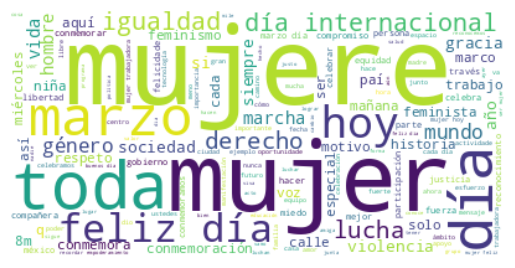

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import nltk
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS

nltk.download('stopwords')

stopwords_español = nltk.corpus.stopwords.words('spanish')
text = " ".join(texto for texto in df.TextoLimpio).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

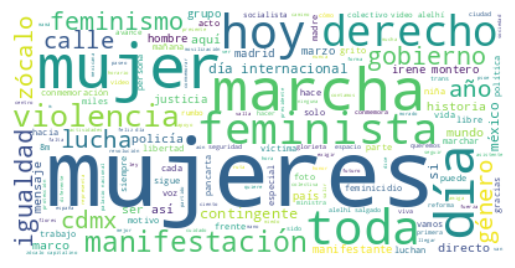

In [56]:
text = " ".join(texto for texto in df100Citados.TextoLimpio).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

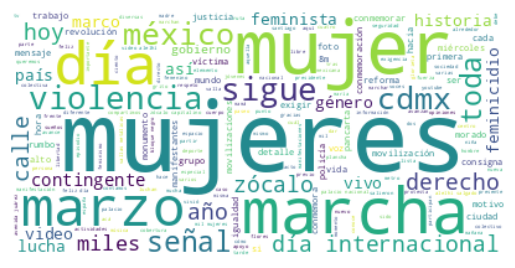

In [57]:
text = " ".join(texto for texto in df100Followers.TextoLimpio).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

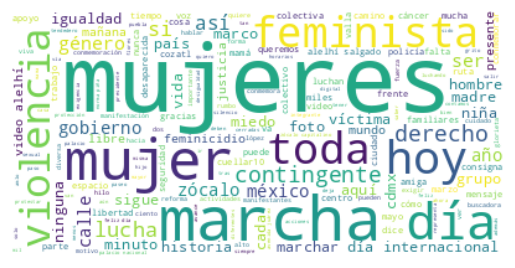

In [58]:
text = " ".join(texto for texto in df100Likes.TextoLimpio).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

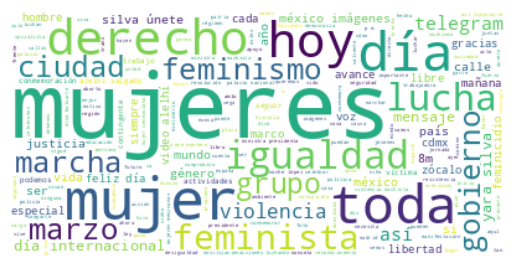

In [59]:
text = " ".join(texto for texto in df100Respuestas.TextoLimpio).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

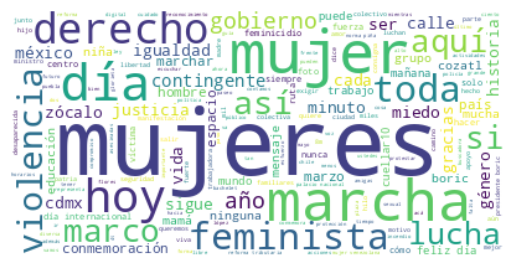

In [60]:
text = " ".join(texto for texto in df100Retweets.TextoLimpio).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

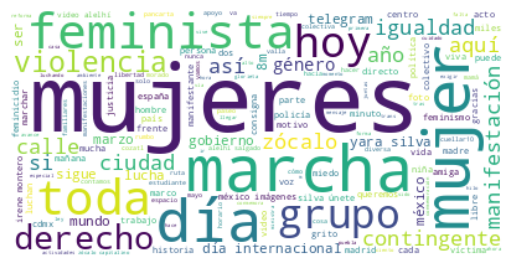

In [61]:
text = " ".join(texto for texto in df100Vistas.TextoLimpio).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

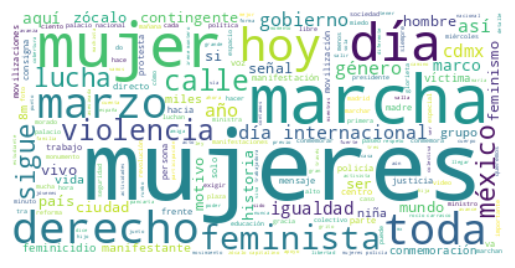

In [62]:
text = " ".join(texto for texto in df500Usuarios.TextoLimpio).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [20]:
from sentiment_analysis_spanish import sentiment_analysis

sentiment = sentiment_analysis.SentimentAnalysisSpanish()

listado_sentimientos = []

for texto in df.TextoLimpio:
    listado_sentimientos.append(sentiment.sentiment(texto))

df['Sentimiento2'] = listado_sentimientos

listado_sentimientos2 = []

for numero in df.Sentimiento2:
  if numero > 0.9:
    listado_sentimientos2.append("Positivo")
  if numero < 0.1:
    listado_sentimientos2.append("Negativo")
  if numero > 0.1 and numero < 0.9:
    listado_sentimientos2.append("Neutro")

df['Sentimiento2Resultado'] = listado_sentimientos2

df['Sentimiento2Resultado'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning:

Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning:

Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



Negativo    138257
Neutro       58933
Positivo      6610
Name: Sentimiento2Resultado, dtype: int64

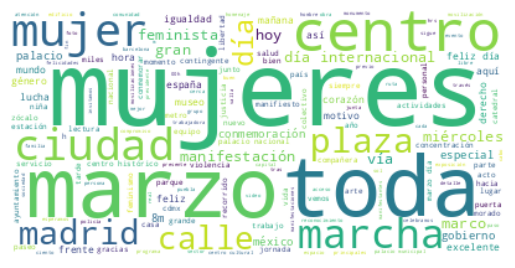

In [63]:
text = " ".join(texto for texto in df.TextoLimpio[df['Sentimiento2Resultado'] == "Positivo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

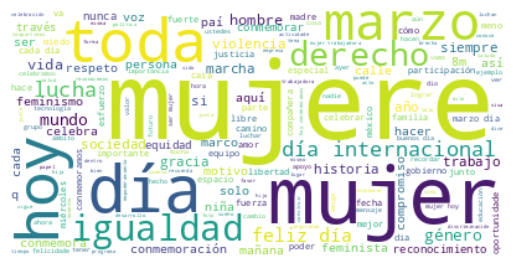

In [64]:
text = " ".join(texto for texto in df.TextoLimpio[df['Sentimiento2Resultado'] == "Negativo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [65]:
listado_sentimientos = []

for texto in df100Citados.TextoLimpio:
    listado_sentimientos.append(sentiment.sentiment(texto))

df100Citados['Sentimiento2'] = listado_sentimientos

listado_sentimientos2 = []

for numero in df100Citados.Sentimiento2:
  if numero > 0.9:
    listado_sentimientos2.append("Positivo")
  if numero < 0.1:
    listado_sentimientos2.append("Negativo")
  if numero > 0.1 and numero < 0.9:
    listado_sentimientos2.append("Neutro")

df100Citados['Sentimiento2Resultado'] = listado_sentimientos2

df100Citados['Sentimiento2Resultado'].value_counts()

Negativo    553
Neutro      159
Positivo     47
Name: Sentimiento2Resultado, dtype: int64

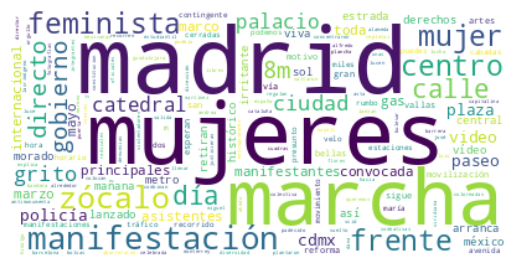

In [66]:
text = " ".join(texto for texto in df100Citados.TextoLimpio[df100Citados['Sentimiento2Resultado'] == "Positivo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

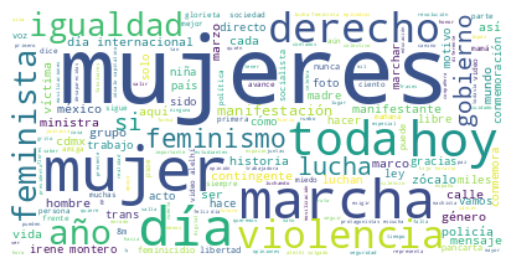

In [67]:
text = " ".join(texto for texto in df100Citados.TextoLimpio[df100Citados['Sentimiento2Resultado'] == "Negativo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [68]:
listado_sentimientos = []

for texto in df100Followers.TextoLimpio:
    listado_sentimientos.append(sentiment.sentiment(texto))

df100Followers['Sentimiento2'] = listado_sentimientos

listado_sentimientos2 = []

for numero in df100Followers.Sentimiento2:
  if numero > 0.9:
    listado_sentimientos2.append("Positivo")
  if numero < 0.1:
    listado_sentimientos2.append("Negativo")
  if numero > 0.1 and numero < 0.9:
    listado_sentimientos2.append("Neutro")

df100Followers['Sentimiento2Resultado'] = listado_sentimientos2

df100Followers['Sentimiento2Resultado'].value_counts()

Negativo    562
Neutro      204
Positivo     51
Name: Sentimiento2Resultado, dtype: int64

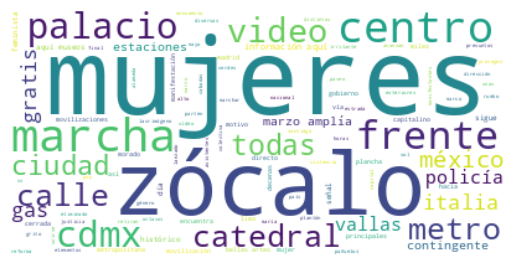

In [69]:
text = " ".join(texto for texto in df100Followers.TextoLimpio[df100Followers['Sentimiento2Resultado'] == "Positivo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

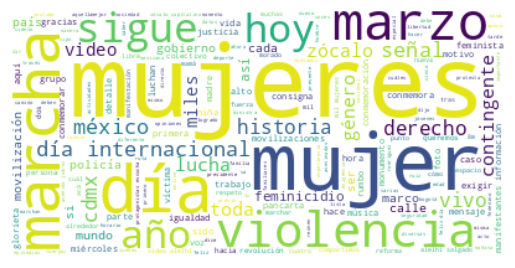

In [70]:
text = " ".join(texto for texto in df100Followers.TextoLimpio[df100Followers['Sentimiento2Resultado'] == "Negativo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [71]:
listado_sentimientos = []

for texto in df100Likes.TextoLimpio:
    listado_sentimientos.append(sentiment.sentiment(texto))

df100Likes['Sentimiento2'] = listado_sentimientos

listado_sentimientos2 = []

for numero in df100Likes.Sentimiento2:
  if numero > 0.9:
    listado_sentimientos2.append("Positivo")
  if numero < 0.1:
    listado_sentimientos2.append("Negativo")
  if numero > 0.1 and numero < 0.9:
    listado_sentimientos2.append("Neutro")

df100Likes['Sentimiento2Resultado'] = listado_sentimientos2

df100Likes['Sentimiento2Resultado'].value_counts()

Negativo    444
Neutro      137
Positivo     28
Name: Sentimiento2Resultado, dtype: int64

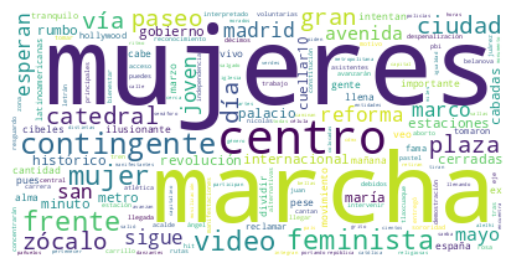

In [72]:
text = " ".join(texto for texto in df100Likes.TextoLimpio[df100Likes['Sentimiento2Resultado'] == "Positivo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

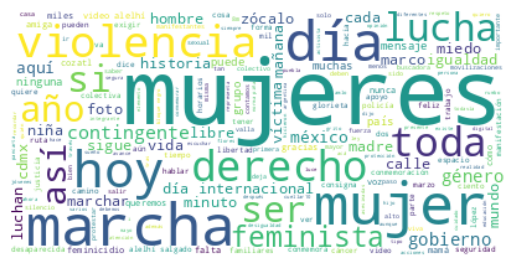

In [73]:
text = " ".join(texto for texto in df100Likes.TextoLimpio[df100Likes['Sentimiento2Resultado'] == "Negativo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [74]:
listado_sentimientos = []

for texto in df100Respuestas.TextoLimpio:
    listado_sentimientos.append(sentiment.sentiment(texto))

df100Respuestas['Sentimiento2'] = listado_sentimientos

listado_sentimientos2 = []

for numero in df100Respuestas.Sentimiento2:
  if numero > 0.9:
    listado_sentimientos2.append("Positivo")
  if numero < 0.1:
    listado_sentimientos2.append("Negativo")
  if numero > 0.1 and numero < 0.9:
    listado_sentimientos2.append("Neutro")

df100Respuestas['Sentimiento2Resultado'] = listado_sentimientos2

df100Respuestas['Sentimiento2Resultado'].value_counts()

Negativo    408
Neutro      184
Positivo     34
Name: Sentimiento2Resultado, dtype: int64

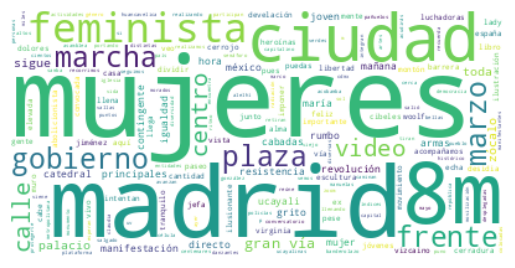

In [75]:
text = " ".join(texto for texto in df100Respuestas.TextoLimpio[df100Respuestas['Sentimiento2Resultado'] == "Positivo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

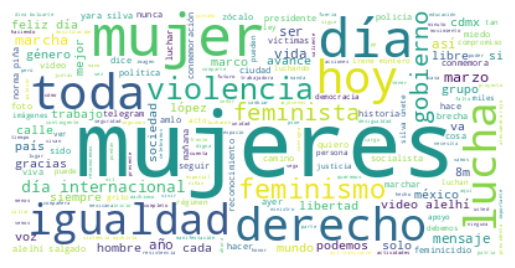

In [76]:
text = " ".join(texto for texto in df100Respuestas.TextoLimpio[df100Respuestas['Sentimiento2Resultado'] == "Negativo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [77]:
listado_sentimientos = []

for texto in df100Retweets.TextoLimpio:
    listado_sentimientos.append(sentiment.sentiment(texto))

df100Retweets['Sentimiento2'] = listado_sentimientos

listado_sentimientos2 = []

for numero in df100Retweets.Sentimiento2:
  if numero > 0.9:
    listado_sentimientos2.append("Positivo")
  if numero < 0.1:
    listado_sentimientos2.append("Negativo")
  if numero > 0.1 and numero < 0.9:
    listado_sentimientos2.append("Neutro")

df100Retweets['Sentimiento2Resultado'] = listado_sentimientos2

df100Retweets['Sentimiento2Resultado'].value_counts()

Negativo    413
Neutro      106
Positivo     22
Name: Sentimiento2Resultado, dtype: int64

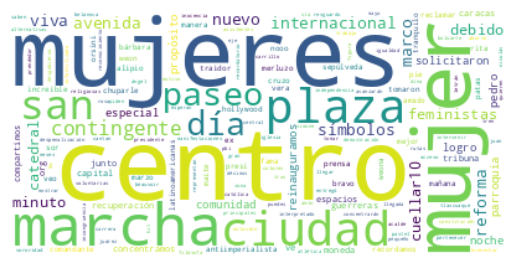

In [78]:
text = " ".join(texto for texto in df100Retweets.TextoLimpio[df100Retweets['Sentimiento2Resultado'] == "Positivo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

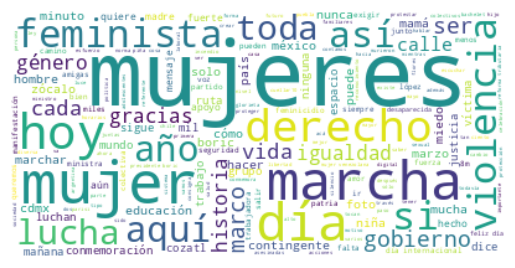

In [79]:
text = " ".join(texto for texto in df100Retweets.TextoLimpio[df100Retweets['Sentimiento2Resultado'] == "Negativo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [80]:
listado_sentimientos = []

for texto in df100Vistas.TextoLimpio:
    listado_sentimientos.append(sentiment.sentiment(texto))

df100Vistas['Sentimiento2'] = listado_sentimientos

listado_sentimientos2 = []

for numero in df100Vistas.Sentimiento2:
  if numero > 0.9:
    listado_sentimientos2.append("Positivo")
  if numero < 0.1:
    listado_sentimientos2.append("Negativo")
  if numero > 0.1 and numero < 0.9:
    listado_sentimientos2.append("Neutro")

df100Vistas['Sentimiento2Resultado'] = listado_sentimientos2

df100Vistas['Sentimiento2Resultado'].value_counts()

Negativo    562
Neutro      204
Positivo     65
Name: Sentimiento2Resultado, dtype: int64

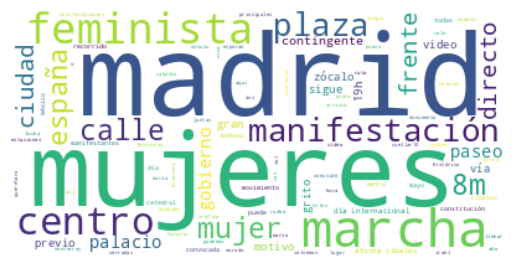

In [81]:
text = " ".join(texto for texto in df100Vistas.TextoLimpio[df100Vistas['Sentimiento2Resultado'] == "Positivo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

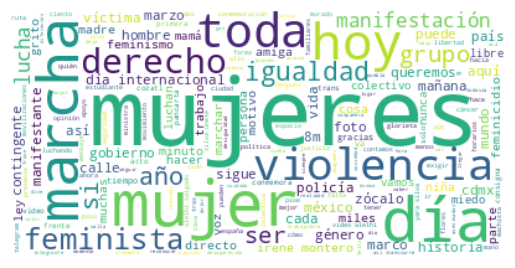

In [82]:
text = " ".join(texto for texto in df100Vistas.TextoLimpio[df100Vistas['Sentimiento2Resultado'] == "Negativo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [83]:
listado_sentimientos = []

for texto in df500Usuarios.TextoLimpio:
    listado_sentimientos.append(sentiment.sentiment(texto))

df500Usuarios['Sentimiento2'] = listado_sentimientos

listado_sentimientos2 = []

for numero in df500Usuarios.Sentimiento2:
  if numero > 0.9:
    listado_sentimientos2.append("Positivo")
  if numero < 0.1:
    listado_sentimientos2.append("Negativo")
  if numero > 0.1 and numero < 0.9:
    listado_sentimientos2.append("Neutro")

df500Usuarios['Sentimiento2Resultado'] = listado_sentimientos2

df500Usuarios['Sentimiento2Resultado'].value_counts()

Negativo    3586
Neutro      1386
Positivo     396
Name: Sentimiento2Resultado, dtype: int64

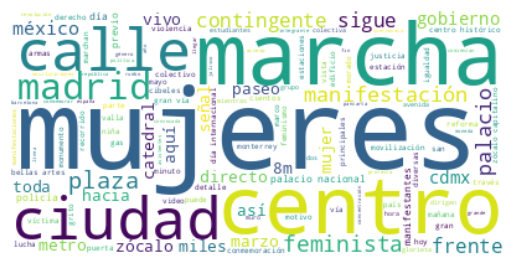

In [84]:
text = " ".join(texto for texto in df500Usuarios.TextoLimpio[df500Usuarios['Sentimiento2Resultado'] == "Positivo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

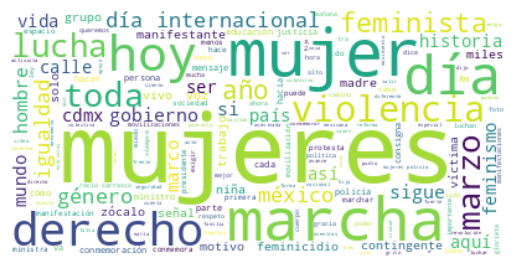

In [85]:
text = " ".join(texto for texto in df500Usuarios.TextoLimpio[df500Usuarios['Sentimiento2Resultado'] == "Negativo"]).lower()
wordcloud = WordCloud(background_color = 'white', stopwords=stopwords_español).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()